# Análise Exploratória

### 1. Tema: Análise dos impactos relacionados à distribuição de profissionais da área de saúde para atuarem em casos de COVID 19
O presente projeto visa realizar uma análise exploratória dos dados considerando a distribuição do número de profissionais de saúde (médicos, enfermeiros, fisioterapeutas) por município, número de leitos na UTI e disponibilidade de respiradores e suas respectivas correlações com a demanda (número de casos que demandaram internação) e eventual impacto em relação ao número de óbitos por COVID-19. Pretende-se determinar se a capacidade da região em relação ao número de profissionais na área de saúde impactou nos casos de óbitos por COVID-19 e verificar se há uma possível “distribuição adequada” da quantidade de profissionais de saúde por habitante, número de leitos e respiradores, que evidencie um melhor atendimento aos pacientes.


### 2. Equipe:
<ul> 
<li>David Lourenço da Costa, 233657, DavidLCostaBR, davidlcosta67@gmail.com, Pós-Graduação Ciência da Computação, UNICAMP.</li>
<li>Leidmar Magnus Festa, 1525280, leidmar, festa@alunos.utfpr.edu.br, Msc Computação Aplicada, UTFPR.</li>
<li>Vinicius Araujo, 157500, ViniciusArj, v157500@dac.unicamp.br, Pós-Graduação Geologia, UNICAMP.</li>
</ul>

### 3. Obtenção e processamento de dados:
A etapa de obtenção de dados foi dividida em três etapas distintas, porém conexas: obtenção do número de médicos, enfermeiros e fisioterapeutas por cidade, obtenção de leitos em Unidades de Terapia Intensiva (UTI) e respiradores por município e número de óbitos por cidade.

#### 3.1 Obtenção do número de médicos, enfermeiros e fisioterapeutas
Os dados do número de médicos e enfermeiros por município foram obtidos a partir da ferramenta denominada de “mapas interativos” criada pelo IBGE (“https://mapasinterativos.ibge.gov.br/covid/saude/”). O arquivo apresenta a quantidade de profissionais médicos tanto no SUS como em hospitais privados em dezembro de 2019 para cada município brasileiro, de acordo com o Cadastro Nacional de Estabelecimento de Saúde (CNES).

Os dados do número de fisioterapeutas por município foram obtidos a partir dos dados da RAIS disponibilizados pelo Ministério do Trabalho no portal PDET - PROGRAMA DE DISSEMINAÇÃO DAS ESTATÍSTICAS DO TRABALHO (“http://pdet.mte.gov.br/acesso-online-as-bases-de-dados/”). O arquivo apresenta a quantidade de fisioterapeutas com atuação específica em reabilitação respiratória (caso de UTIs) e também fisiterapeutas gerais, que, eventualmente, podem atuar de forma contingencial no atendimento de COVID-19.

#### 3.2 Obtenção do número de leitos em UTIs e respiradores
Os dados do número de leitos em UTIs para cada cidade brasileira, assim como os dados de médicos e enfermeiros por município, foram obtidos a partir dos dados do IBGE. Deve-se destacar que tais dados representam o número de leitos em UTIs presentes no CNES até dezembro de 2019. 

#### 3.3 Obtenção do número de óbitos por município

Os dados do número de óbitos em decorrência da COVID-19 foram obtidos a partir Sistema de Informação sobre Mortalidade – SIM (“https://opendatasus.saude.gov.br/dataset/sistema-de-informacao-sobre-mortalidade”). O arquivo apresenta o registro de todos os óbitos ocorridos por município.
Foi feito um corte dos óbitos referentes a COVID-19, que, segundo o Ministério da Saúde corresponde aos marcadores "B34.2" e "U07.1", conforme apresentado em: http://portalarquivos2.saude.gov.br/images/pdf/2020/April/29/Nota-Informativa-declara----o-obito.pdf

#### 3.4 Processamento dos dados
Utilizando os datasets anteriormente indicados, foram obtidas as informações básicas sobre as equipes médicas compostas de médicos, enfermeiros, fisioterapeutas; dados de leitos em UTIs e respiradores que compõem as instalações utilizadas para atendimento aos casos de COVID-19 graves que demandam um suporte hospitalar especializado. Esses dados foram então consolidados junto com os indicadores de óbitos, gerando um único arquivo denominado "DadosConsolidados.csv", que serviu como fontes de dados para as análises realizadas.

Nessa etapa de consolidação dos dados em uma única fonte, alguns desafios foram encontrados, a saber:

1) As bases de dados utilizadas de Mapas Interativos, utilizadas para obter os dados de médicos, enfermeiros, dados de de leitos em UTIs e respiradores, possuem o código do município como um dos dados disponibilizados. Já a base de dados da RAIS, utilizada para obter os dados de fisioterapeutas não possuí o código do município somente o nome, o que demandou um trabalho extra para integrar os dados, pois foi necessário fazer a associação entre as bases de dados pelo nome do munícipio. Ocorre ainda que os nomes não estavam padronizados, sendo que na base da RAIS os nomes não são acentuados, além do problema referente a municípios com o mesmo nome (homônimos) em estados diferentes. Foi necessário fazer uma verificação manual de todos os dados existentes para ajustá-los e padronizá-los.

2) A base de dados de óbitos é analítica, registrando todos os tipos de óbitos de forma detalhada par cada caso registrado. Foi necessário realizar um filtro pelos códigos de óbitos indicados para COVID-19, e um agrupamento dos dados por munícipio.


### 4. Cobertura e distribuição dos dados


#### 4.1 Carregamento dos dados a partir do arquivo DadosConsolidados.csv

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#abrindo os dataSets com delimitador ";"
dfDados = pd.read_csv('./data/DadosConsolidados.csv', delimiter=";", encoding='latin-1')

#definindo os indexes:
dfDados = dfDados.set_index('Codigo_Municipio')

dfDados.sample(5)

Nome_municipio Nome_Estado    Região  Pop_Total  \
Codigo_Municipio                                                   
2910404            Encruzilhada       Bahia  Nordeste      17006   
2303303                  Cariús       Ceará  Nordeste      18699   
2311702               Reriutaba       Ceará  Nordeste      18491   
3515509           Fernandópolis   São Paulo   Sudeste      69116   
3532702                   Nipoã   São Paulo   Sudeste       5213   

                  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
Codigo_Municipio                                                   
2910404                      0             12                 16   
2303303                      2              5                 10   
2311702                      0              7                 27   
3515509                      0            222                133   
3532702                      0              1                  6   

                  Total_Fisio_Respiratoria  Total_Fisio_Geral  \
Codigo_Municipio                                                
2910404                                  0                 16   
2303303                                  1                  4   
2311702                                  0                 56   
3515509                                  0                267   
3532702                                  0                 23   

                  Total_Profissionais_Saude  Total_Leitos_UTI  \
Codigo_Municipio                                                
2910404                                  44                 0   
2303303                                  19                 0   
2311702                                  90                 0   
3515509                                 622                10   
3532702                                  30                 0   

                  Total_Respiradores  Obitos_Por100mil  Medicos_Por100mil  \
Codigo_Municipio                                                            
2910404                            0               0.0              136.8   
2303303                            0              22.8               57.0   
2311702                            0               0.0               79.8   
3515509                           33               0.0             2530.5   
3532702                            0               0.0               11.4   

                  Enfermeiros_Por100mil  FisioResp_Por100mil  \
Codigo_Municipio                                               
2910404                           182.4                  0.0   
2303303                           114.0                 11.4   
2311702                           307.8                  0.0   
3515509                          1516.0                  0.0   
3532702                            68.4                  0.0   

                  FisioGeral_Por100mil  TotalProf_Por100mil  \
Codigo_Municipio                                              
2910404                          182.4                501.5   
2303303                           45.6                216.6   
2311702                          638.3               1025.9   
3515509                         3043.4               7089.9   
3532702                          262.2                342.0   

                  TotalLeitos_Por100mil  TotalResp_Por100mil  
Codigo_Municipio                                              
2910404                             0.0                  0.0  
2303303                             0.0                  0.0  
2311702                             0.0                  0.0  
3515509                           114.0                376.2  
3532702                             0.0                  0.0

In [13]:
dfDados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 5200050 to 4219853
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nome_municipio             5570 non-null   object 
 1   Nome_Estado                5570 non-null   object 
 2   Região                     5570 non-null   object 
 3   Pop_Total                  5570 non-null   int64  
 4   Total_Obitos               5570 non-null   int64  
 5   Total_Medicos              5570 non-null   int64  
 6   Total_Enfermeiros          5570 non-null   int64  
 7   Total_Fisio_Respiratoria   5570 non-null   int64  
 8   Total_Fisio_Geral          5570 non-null   int64  
 9   Total_Profissionais_Saude  5570 non-null   int64  
 10  Total_Leitos_UTI           5570 non-null   int64  
 11  Total_Respiradores         5570 non-null   int64  
 12  Obitos_Por100mil           5570 non-null   float64
 13  Medicos_Por100mil          5570 non-nul

Conforme apresentado, o conjunto de dados consolidado obtido para análise corresponde aos dados de 5.570 municípios.

#### 4.2 Análise da Distribuição de Dados 

A seguir, para entender melhor a sua distribuição, foram realizadas análises descritivas dos dados acima com foco nas variáveis numéricas de maior interesse: Total_Obitos, Total_Medicos, Total_Enfermeiros e Total_Fisioterapeutas (Respiratória e Geral), Total de Leitos e Total_Respiradores.
Foi utilizado o critério de normalização dos dados correspondente ao total por 100 mil habitantes, conforme utilizado na base de dados Mapas Interativos.

In [27]:
dfDados.describe()

Pop_Total  Total_Obitos  Total_Medicos  Total_Enfermeiros  \
count  5.570000e+03   5570.000000    5570.000000        5570.000000   
mean   3.772839e+04      2.286176      74.247576          48.066248   
std    2.214581e+05     47.310412     777.636417         422.156712   
min    7.810000e+02      0.000000       0.000000           0.000000   
25%    5.446500e+03      0.000000       3.000000           5.000000   
50%    1.163100e+04      0.000000       6.000000          10.000000   
75%    2.549050e+04      0.000000      17.000000          20.000000   
max    1.225202e+07   2420.000000   43201.000000       23551.000000   

       Total_Fisio_Respiratoria  Total_Fisio_Geral  Total_Profissionais_Saude  \
count               5570.000000        5570.000000                5570.000000   
mean                   0.595332          97.498923                 219.812747   
std                   23.705774        1087.617156                2266.333643   
min                    0.000000           0.000000                   0.000000   
25%                    0.000000           4.000000                  16.000000   
50%                    0.000000          14.000000                  31.000000   
75%                    0.000000          36.000000                  74.000000   
max                 1560.000000       56480.000000              123232.000000   

       Total_Leitos_UTI  Total_Respiradores  Obitos_Por100mil  \
count       5570.000000         5570.000000       5570.000000   
mean           5.729443           11.171095         26.059569   
std           68.944380          129.820736        539.272586   
min            0.000000            0.000000          0.000000   
25%            0.000000            0.000000          0.000000   
50%            0.000000            0.000000          0.000000   
75%            0.000000            2.000000          0.000000   
max         3504.000000         7173.000000      27584.600000   

       Medicos_Por100mil  Enfermeiros_Por100mil  FisioResp_Por100mil  \
count        5570.000000            5570.000000          5570.000000   
mean          846.326104             547.898528             6.786032   
std          8863.972282            4811.998276           270.212621   
min             0.000000               0.000000             0.000000   
25%            34.200000              57.000000             0.000000   
50%            68.400000             114.000000             0.000000   
75%           193.800000             228.000000             0.000000   
max        492431.300000          268448.600000         17781.800000   

       FisioGeral_Por100mil  TotalProf_Por100mil  TotalLeitos_Por100mil  \
count           5570.000000         5.570000e+03            5570.000000   
mean            1111.359695         2.505568e+03              65.308761   
std            12397.323126         2.583305e+04             785.869852   
min                0.000000         0.000000e+00               0.000000   
25%               45.600000         1.824000e+02               0.000000   
50%              159.600000         3.534000e+02               0.000000   
75%              410.300000         8.435000e+02               0.000000   
max           643793.500000         1.404673e+06           39940.700000   

       TotalResp_Por100mil  
count          5570.000000  
mean            127.336697  
std            1479.775544  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%              22.800000  
max           81762.200000

Os próximos gráficos apresentam como é a distribuição das variáveis de maior interesse para o trabalho: Medicos_Por100mil, TotalProf_Por100mil,	TotalLeitos_Por100mil e TotalResp_Por100mil
Para obter um resultado representativo, foi realizado um corte para Municípios com População acima de 750 mil habitantes, denominados pelo IBGE "grandes concentrações urbanas", conforme apresentado em: https://pt.wikipedia.org/wiki/Lista_de_concentra%C3%A7%C3%B5es_urbanas_do_Brasil_por_popula%C3%A7%C3%A3o


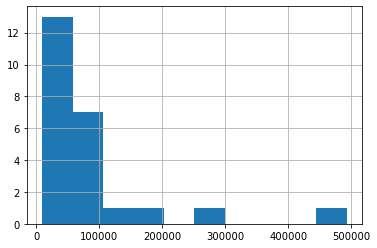

In [30]:
selecao = (dfDados['Pop_Total'] >= 750000)
df_filtrado = dfDados[selecao]
df_filtrado['Medicos_Por100mil'].hist(bins=10)

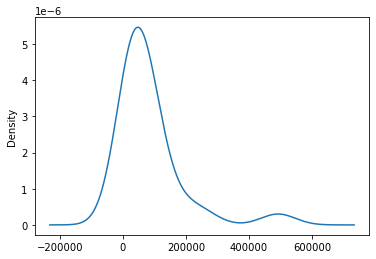

In [34]:
df_filtrado['Medicos_Por100mil'].plot.kde()

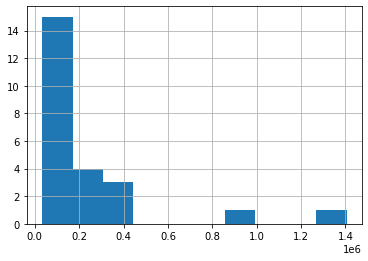

In [31]:
df_filtrado['TotalProf_Por100mil'].hist(bins=10)

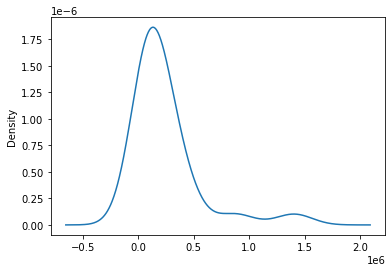

In [35]:
df_filtrado['TotalProf_Por100mil'].plot.kde()

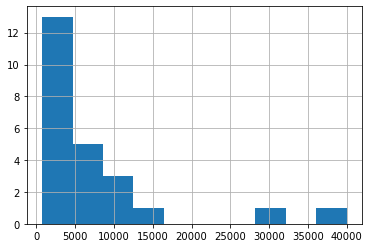

In [32]:
df_filtrado['TotalLeitos_Por100mil'].hist(bins=10)

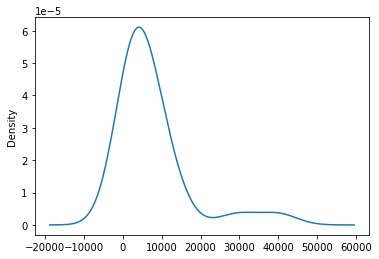

In [36]:
df_filtrado['TotalLeitos_Por100mil'].plot.kde()

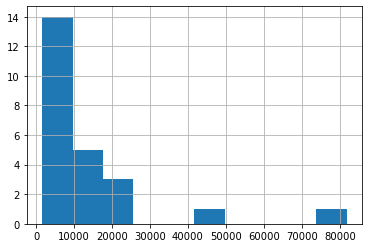

In [33]:
df_filtrado['TotalResp_Por100mil'].hist(bins=10)

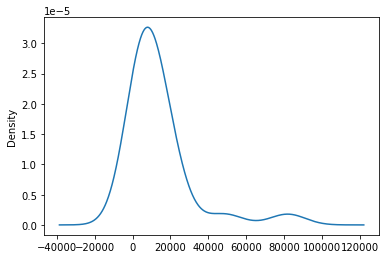

In [37]:
df_filtrado['TotalResp_Por100mil'].plot.kde()

Em seguida são apresentadas os gráficos de boxplot das variáveis analisadas com detalhamento por tipo de profissional de saúde (Médicos, Enfermeiros e FIsioterapeutas Gerais) e recursos (Leitos e Respiradores) por 100 mil habitantes.

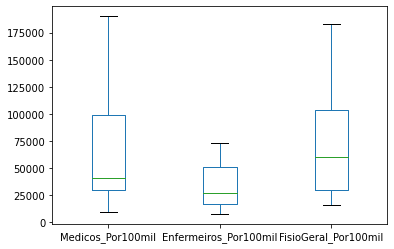

In [40]:
df_filtrado[['Medicos_Por100mil', 'Enfermeiros_Por100mil','FisioGeral_Por100mil']].plot.box(showfliers=False)

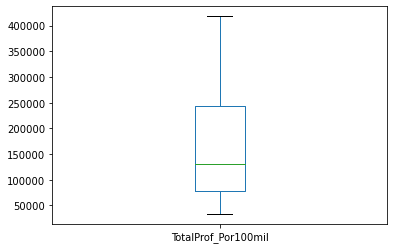

In [41]:
df_filtrado[['TotalProf_Por100mil']].plot.box(showfliers=False)

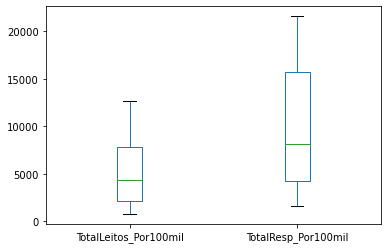

In [42]:
df_filtrado[['TotalLeitos_Por100mil','TotalResp_Por100mil']].plot.box(showfliers=False)

#### 4.3 Análises de correlação entre variáveis

In [48]:
dfDados.corr()

Pop_Total  Total_Obitos  Total_Medicos  \
Pop_Total                   1.000000      0.862849       0.970643   
Total_Obitos                0.862849      1.000000       0.814056   
Total_Medicos               0.970643      0.814056       1.000000   
Total_Enfermeiros           0.984411      0.838628       0.989007   
Total_Fisio_Respiratoria    0.362447      0.261958       0.472802   
Total_Fisio_Geral           0.959327      0.844545       0.959707   
Total_Profissionais_Saude   0.976804      0.840835       0.987915   
Total_Leitos_UTI            0.962606      0.840543       0.974580   
Total_Respiradores          0.978920      0.853675       0.985154   
Obitos_Por100mil            0.862849      1.000000       0.814056   
Medicos_Por100mil           0.970643      0.814056       1.000000   
Enfermeiros_Por100mil       0.984411      0.838628       0.989007   
FisioResp_Por100mil         0.362448      0.261959       0.472802   
FisioGeral_Por100mil        0.959327      0.844545       0.959707   
TotalProf_Por100mil         0.976804      0.840835       0.987915   
TotalLeitos_Por100mil       0.962606      0.840543       0.974580   
TotalResp_Por100mil         0.978920      0.853675       0.985154   

                           Total_Enfermeiros  Total_Fisio_Respiratoria  \
Pop_Total                           0.984411                  0.362447   
Total_Obitos                        0.838628                  0.261958   
Total_Medicos                       0.989007                  0.472802   
Total_Enfermeiros                   1.000000                  0.411959   
Total_Fisio_Respiratoria            0.411959                  1.000000   
Total_Fisio_Geral                   0.977565                  0.410137   
Total_Profissionais_Saude           0.994761                  0.435792   
Total_Leitos_UTI                    0.982694                  0.463153   
Total_Respiradores                  0.993302                  0.409994   
Obitos_Por100mil                    0.838628                  0.261957   
Medicos_Por100mil                   0.989007                  0.472802   
Enfermeiros_Por100mil               1.000000                  0.411959   
FisioResp_Por100mil                 0.411960                  1.000000   
FisioGeral_Por100mil                0.977565                  0.410137   
TotalProf_Por100mil                 0.994761                  0.435792   
TotalLeitos_Por100mil               0.982694                  0.463153   
TotalResp_Por100mil                 0.993302                  0.409994   

                           Total_Fisio_Geral  Total_Profissionais_Saude  \
Pop_Total                           0.959327                   0.976804   
Total_Obitos                        0.844545                   0.840835   
Total_Medicos                       0.959707                   0.987915   
Total_Enfermeiros                   0.977565                   0.994761   
Total_Fisio_Respiratoria            0.410137                   0.435792   
Total_Fisio_Geral                   1.000000                   0.991295   
Total_Profissionais_Saude           0.991295                   1.000000   
Total_Leitos_UTI                    0.977518                   0.986565   
Total_Respiradores                  0.976360                   0.991613   
Obitos_Por100mil                    0.844544                   0.840835   
Medicos_Por100mil                   0.959707                   0.987915   
Enfermeiros_Por100mil               0.977565                   0.994761   
FisioResp_Por100mil                 0.410137                   0.435793   
FisioGeral_Por100mil                1.000000                   0.991295   
TotalProf_Por100mil                 0.991295                   1.000000   
TotalLeitos_Por100mil               0.977518                   0.986565   
TotalResp_Por100mil                 0.976360                   0.991613   

                           Total_Leitos_UTI  Total_Respiradores  \
Pop_Total                        

Observa-se uma correlação alta entre Total_Obitos e todas as outras variáveis com excessão de Fisio_Respiratoria.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC1606D070>,
      dtype=object)

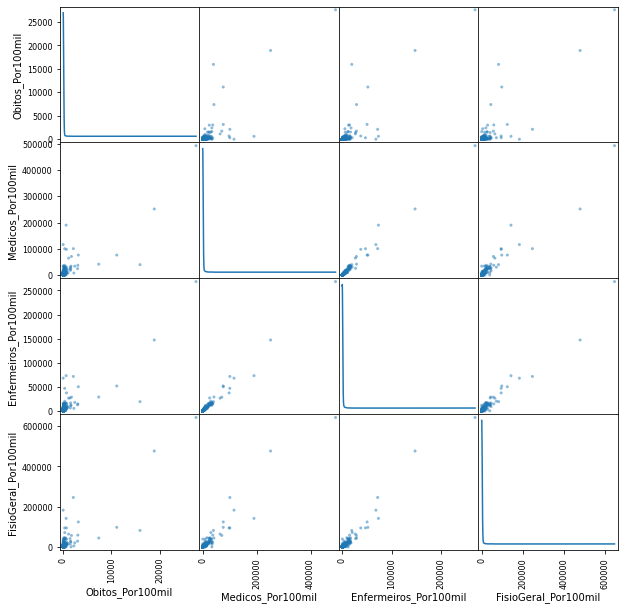

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(dfDados[['Obitos_Por100mil','Medicos_Por100mil','Enfermeiros_Por100mil','FisioGeral_Por100mil']], figsize=(10, 10), diagonal='kde')

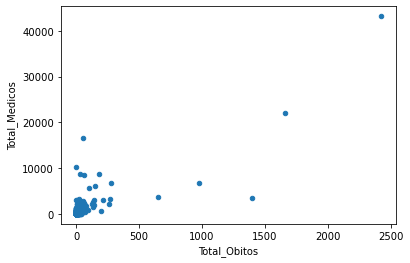

In [51]:
dfDados.plot.scatter(x='Total_Obitos', y='Total_Medicos')

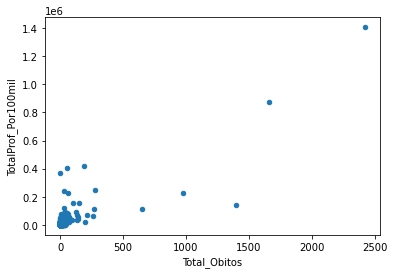

In [49]:
dfDados.plot.scatter(x='Total_Obitos', y='TotalProf_Por100mil')

### 5. Perguntas de pesquisa e explorações iniciais


Em seguida são apresentados gráficos e realizadas algumas análises sobre os dados coletados. 

#### 5.1  Análise Inicial dos dados de Médicos, Enfermeiros e Fisioterapeutas

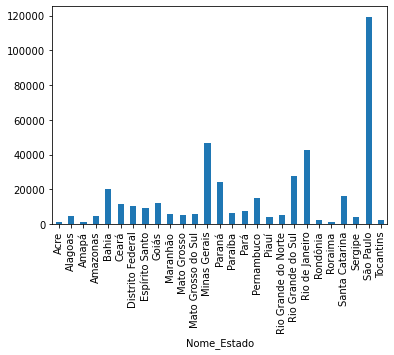

In [45]:
dfSumEstado = dfDados.groupby(['Nome_Estado']).Total_Medicos.sum().rename('Total_Medicos') 
barrasUf = dfSumEstado.plot.bar(x='Nome_Estado', y='Total de Médicos')

Note que São Paulo é o Estado que possui maior quantidade total de médicos, enquanto que Estados como Acre, Amapa e Roraima apresentam a menor quantidade total de médicos. 

Como exemplo, iremos utilizar a **REGIÃO SUL** como objeto de análise. Deve-se destacar que tal região foi escolhida aleatoriamente. 

In [24]:
# Apresentar osdados de forma decrescente do número Total de Médicos
dfMedMunSul.sort_values(['TotalMedicos'], ascending=False)

NomeDoMunicipio             Estado Regiao  \
Código do Município                                                     
4106902                            Curitiba             Paraná    Sul   
4205407                       Florianópolis     Santa Catarina    Sul   
4305108                       Caxias do Sul  Rio Grande do Sul    Sul   
4202404                            Blumenau     Santa Catarina    Sul   
4304606                              Canoas  Rio Grande do Sul    Sul   
...                                     ...                ...    ...   
4304853                        Carlos Gomes  Rio Grande do Sul    Sul   
4308250                    Floriano Peixoto  Rio Grande do Sul    Sul   
4308433                         Forquetinha  Rio Grande do Sul    Sul   
4306551              Dom Pedro de Alcântara  Rio Grande do Sul    Sul   
4102703                     Barra do Jacaré             Paraná    Sul   

                     PopulTotEstim2019  TotalMedicos  Total de Médicos no SUS  \
Código do Município                                                             
4106902                        1933105          8595                     4989   
4205407                         500973          3024                     1840   
4305108                         510906          1745                     1140   
4202404                         357199          1260                      816   
4304606                         346616          1116                      839   
...                                ...           ...                      ...   
4304853                           1377             0                        0   
4308250                           1766             0                        0   
4308433                           2412             0                        0   
4306551                           2534             0                        0   
4102703                           2781             0                        0   

                     Médicos no SUS a cada 100mil hab  \
Código do Município                                     
4106902                                    258.082205   
4205407                                    367.285263   
4305108                                    223.133023   
4202404                                    228.444089   
4304606                                    242.054608   
...                                               ...   
4304853                                      0.000000   
4308250                                      0.000000   
4308433                                      0.000000   
4306551                                      0.000000   
4102703                                      0.000000   

                     Médicos a cada 100mil hab  Percentual de médicos no SUS  
Código do Município                                                           
4106902                             444.621477                     58.045375  
4205407                             603.625345                     60.846561  
4305108                             341.550109                     65.329513  
4202404                             352.744549                     64.761905  
4304606                             321.970134                     75.179211  
...                                        ...                           ...  
4304853                               0.000000                      0.000000  
4308250                               0.000000                      0.000000  
4308433                               0.000000                      0.000000  
4306551                               0.000000                      0.000000  
4102703                               0.000000                      0.000000  

[426 rows x 9 columns]

Text(0, 0.5, 'Contagem Municípios')

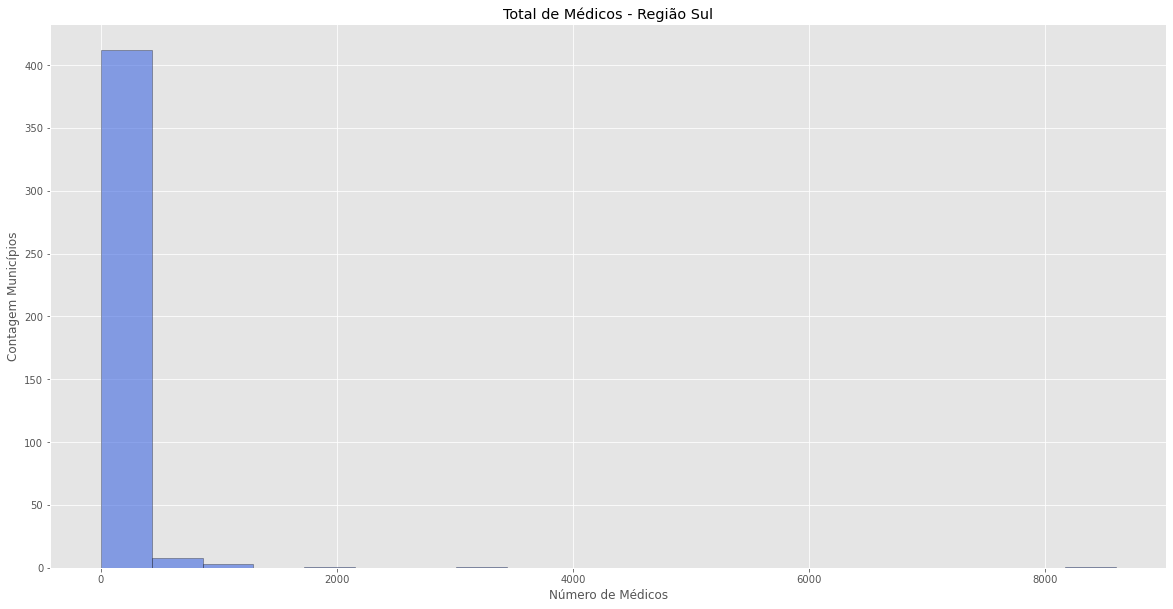

In [27]:
# Agora iremos gerar um gráfico de barras para verificar a quantidade de médicos por município
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
dfMedMunSul["TotalMedicos"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Total de Médicos - Região Sul")
plt.xlabel("Número de Médicos")
plt.ylabel("Contagem Municípios")

Note que mais de 400 cidades da região Sul do pais possuem médicos próximo ao 0. 

Agora iremos dar um zoom na região que estão concentrados a maior quantidade de dados (região onde o total de médicos é menor que 2000).

Text(0, 0.5, 'Contagem de Municípios')

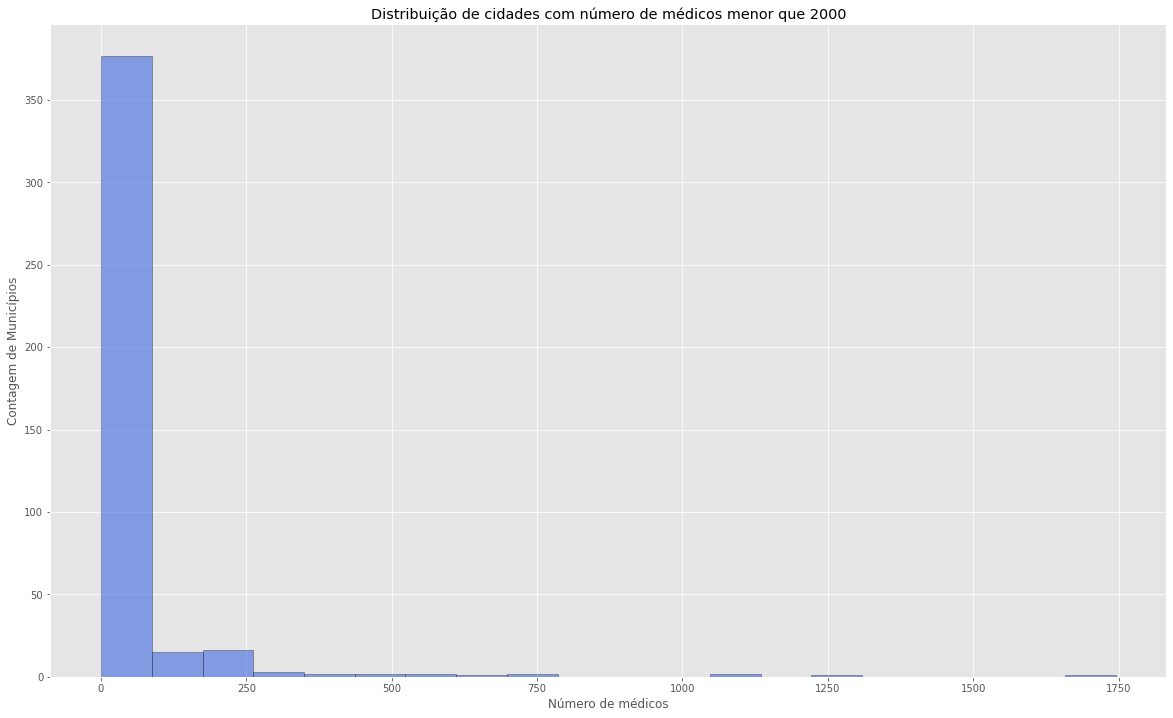

In [29]:
plt.figure(figsize = (20, 12))
dfMedMunSul[dfMedMunSul["TotalMedicos"] <2000]["TotalMedicos"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de médicos menor que 2000")
plt.xlabel("Número de médicos")
plt.ylabel("Contagem de Municípios")

#### 5.2  Análise Inicial dos dados de UTIs

In [1]:
#abrindo os dataSets
df = pd.read_csv('./data/mapasInterativos/Leitos_de_UTI_em_2019.csv')
df.sample(20)

NameError: name 'pd' is not defined

In [39]:
# Definindo os índices e retirando colunas indesejáveis nesta primeira análise
df = df.set_index('OBJECTID_1')
df = df.drop(['X', 'Y', 'Leitos_UTI_SUS_Total', 
              'Leitos_UTI_SUS_100mil_hab_Ind' ], axis=1)
df

Código_do_Município       Nome_Estado         Nome_municipio  \
OBJECTID_1                                                                 
1                       1100015          Rondônia  Alta Floresta D'Oeste   
2                       1100023          Rondônia              Ariquemes   
3                       1100031          Rondônia                 Cabixi   
4                       1100049          Rondônia                 Cacoal   
5                       1100056          Rondônia             Cerejeiras   
...                         ...               ...                    ...   
5566                    5222005             Goiás             Vianópolis   
5567                    5222054             Goiás         Vicentinópolis   
5568                    5222203             Goiás               Vila Boa   
5569                    5222302             Goiás          Vila Propício   
5570                    5300108  Distrito Federal               Brasília   

            Pop_total  Leitos_UTI_Total_1  Leitos_UTI_100mil_hab_Ind_1  
OBJECTID_1                                                              
1               22945                   0                     0.000000  
2              107863                  19                    17.614937  
3                5312                   0                     0.000000  
4               85359                  28                    32.802634  
5               16323                   0                     0.000000  
...               ...                 ...                          ...  
5566            13863                   0                     0.000000  
5567             8743                   0                     0.000000  
5568             6171                   0                     0.000000  
5569             5821                   0                     0.000000  
5570          3015268                 907                    30.080245  

[5570 rows x 6 columns]

Devemos destacar que o número de linhas (5570 rows) é igual ao número de municípios brasileiros.

In [40]:
# Agora vamos analisar se há linha com valores inválidos
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Código_do_Município, Nome_Estado, Nome_municipio, Pop_total, Leitos_UTI_Total_1, Leitos_UTI_100mil_hab_Ind_1]
Index: []

In [41]:
# Vamos normalizar os valores para 10mil habitantes, conforme recomendações da OMS e Ministério da Saúde
df['LeitosUTItotal10mil'] = df['Leitos_UTI_100mil_hab_Ind_1'] / 10
df

Código_do_Município       Nome_Estado         Nome_municipio  \
OBJECTID_1                                                                 
1                       1100015          Rondônia  Alta Floresta D'Oeste   
2                       1100023          Rondônia              Ariquemes   
3                       1100031          Rondônia                 Cabixi   
4                       1100049          Rondônia                 Cacoal   
5                       1100056          Rondônia             Cerejeiras   
...                         ...               ...                    ...   
5566                    5222005             Goiás             Vianópolis   
5567                    5222054             Goiás         Vicentinópolis   
5568                    5222203             Goiás               Vila Boa   
5569                    5222302             Goiás          Vila Propício   
5570                    5300108  Distrito Federal               Brasília   

            Pop_total  Leitos_UTI_Total_1  Leitos_UTI_100mil_hab_Ind_1  \
OBJECTID_1                                                               
1               22945                   0                     0.000000   
2              107863                  19                    17.614937   
3                5312                   0                     0.000000   
4               85359                  28                    32.802634   
5               16323                   0                     0.000000   
...               ...                 ...                          ...   
5566            13863                   0                     0.000000   
5567             8743                   0                     0.000000   
5568             6171                   0                     0.000000   
5569             5821                   0                     0.000000   
5570          3015268                 907                    30.080245   

            LeitosUTItotal10mil  
OBJECTID_1                       
1                      0.000000  
2                      1.761494  
3                      0.000000  
4                      3.280263  
5                      0.000000  
...                         ...  
5566                   0.000000  
5567                   0.000000  
5568                   0.000000  
5569                   0.000000  
5570                   3.008024  

[5570 rows x 7 columns]

In [42]:
# Retirando colunas indesejáveis
df = df.drop(['Leitos_UTI_100mil_hab_Ind_1'], axis=1)
df

Código_do_Município       Nome_Estado         Nome_municipio  \
OBJECTID_1                                                                 
1                       1100015          Rondônia  Alta Floresta D'Oeste   
2                       1100023          Rondônia              Ariquemes   
3                       1100031          Rondônia                 Cabixi   
4                       1100049          Rondônia                 Cacoal   
5                       1100056          Rondônia             Cerejeiras   
...                         ...               ...                    ...   
5566                    5222005             Goiás             Vianópolis   
5567                    5222054             Goiás         Vicentinópolis   
5568                    5222203             Goiás               Vila Boa   
5569                    5222302             Goiás          Vila Propício   
5570                    5300108  Distrito Federal               Brasília   

            Pop_total  Leitos_UTI_Total_1  LeitosUTItotal10mil  
OBJECTID_1                                                      
1               22945                   0             0.000000  
2              107863                  19             1.761494  
3                5312                   0             0.000000  
4               85359                  28             3.280263  
5               16323                   0             0.000000  
...               ...                 ...                  ...  
5566            13863                   0             0.000000  
5567             8743                   0             0.000000  
5568             6171                   0             0.000000  
5569             5821                   0             0.000000  
5570          3015268                 907             3.008024  

[5570 rows x 6 columns]

Normalização
Segundo recomendações da OMS e do Ministério da Saúde, a relação ideal de leitos de UTI é de 1 a 3 leitos para cada 10mil habitantes (relatório disponibilizado pela AMIB - março, 2020).(artigo retirado de "https://www.amib.org.br/fileadmin/user_upload/amib/2020/abril/28/dados_uti_amib.pdf")

Agora iremos analisar quais municípios possuem valores acima e abaixo de 1 leito para cada 10mil, conforme exposto acima.

In [43]:
# Vamos re-ordenar os dados conforme o número de leitos p/ 10mil hab
df.sort_values(['LeitosUTItotal10mil'], ascending = False)

Código_do_Município     Nome_Estado         Nome_municipio  \
OBJECTID_1                                                               
3971                    4104204          Paraná            Campo Largo   
5480                    5214507           Goiás              Nerópolis   
3968                    4104006          Paraná  Campina Grande do Sul   
1383                    2511301         Paraíba                 Piancó   
3193                    3301108  Rio de Janeiro              Cantagalo   
...                         ...             ...                    ...   
1897                    2905602           Bahia                Camacan   
1896                    2905503           Bahia       Caldeirão Grande   
1895                    2905404           Bahia                  Cairu   
1894                    2905305           Bahia              Cafarnaum   
2786                    3146305    Minas Gerais          Padre Paraíso   

            Pop_total  Leitos_UTI_Total_1  LeitosUTItotal10mil  
OBJECTID_1                                                      
3971           132002                 301            22.802685  
5480            29850                  50            16.750419  
3968            43288                  68            15.708741  
1383            16075                  20            12.441680  
3193            20172                  20             9.914733  
...               ...                 ...                  ...  
1897            31988                   0             0.000000  
1896            13327                   0             0.000000  
1895            18176                   0             0.000000  
1894            18437                   0             0.000000  
2786            20154                   0             0.000000  

[5570 rows x 6 columns]

Após a organização dos dados apresentada acima, foi possível realizar diversas análises básicas.

In [44]:
# Inicialmente, iremos avaliar todos os municípios
df['LeitosUTItotal10mil'].describe()

count    5570.000000
mean        0.224829
std         0.917098
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.802685
Name: LeitosUTItotal10mil, dtype: float64

Text(0, 0.5, 'Total de Municípios')

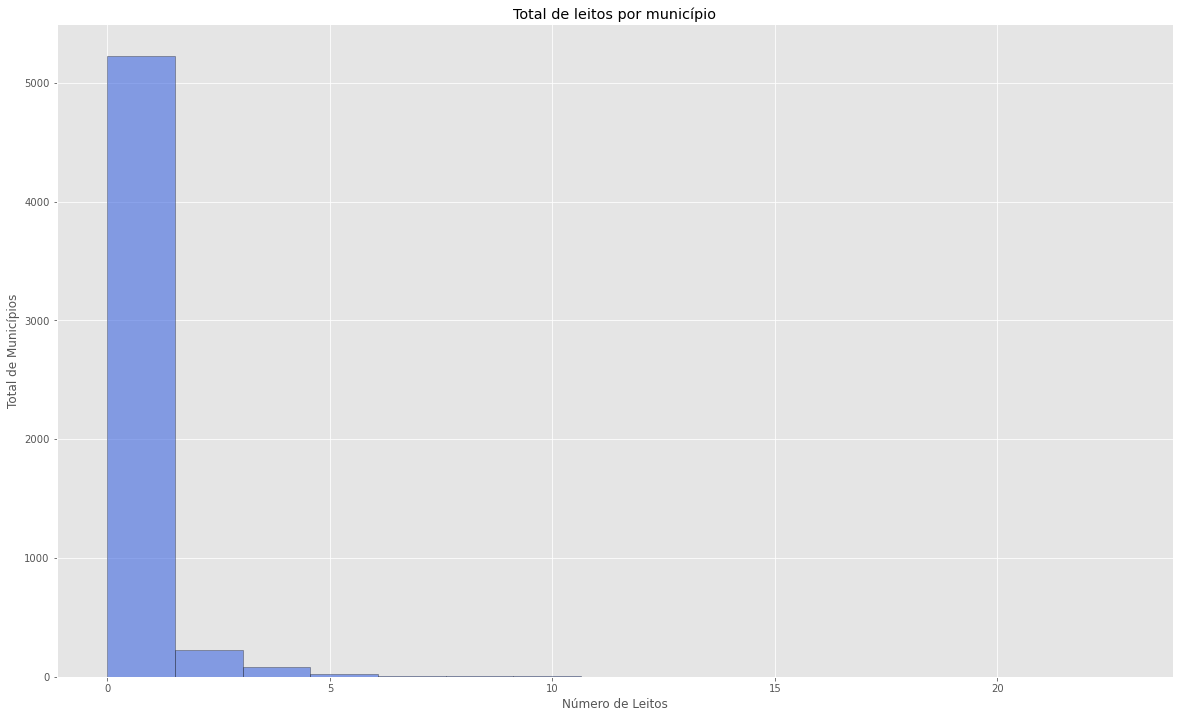

In [45]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["LeitosUTItotal10mil"].hist(bins = 15, ec = "k", alpha = .6, color = "royalblue")
plt.title("Total de leitos por município")
plt.xlabel("Número de Leitos")
plt.ylabel("Total de Municípios")

Agora iremos dar um zoom na região que estão concentrados a maior quantidade de dados (região onde o total de UTIs é menor que 5).

Text(0, 0.5, 'Contagem de Municípios')

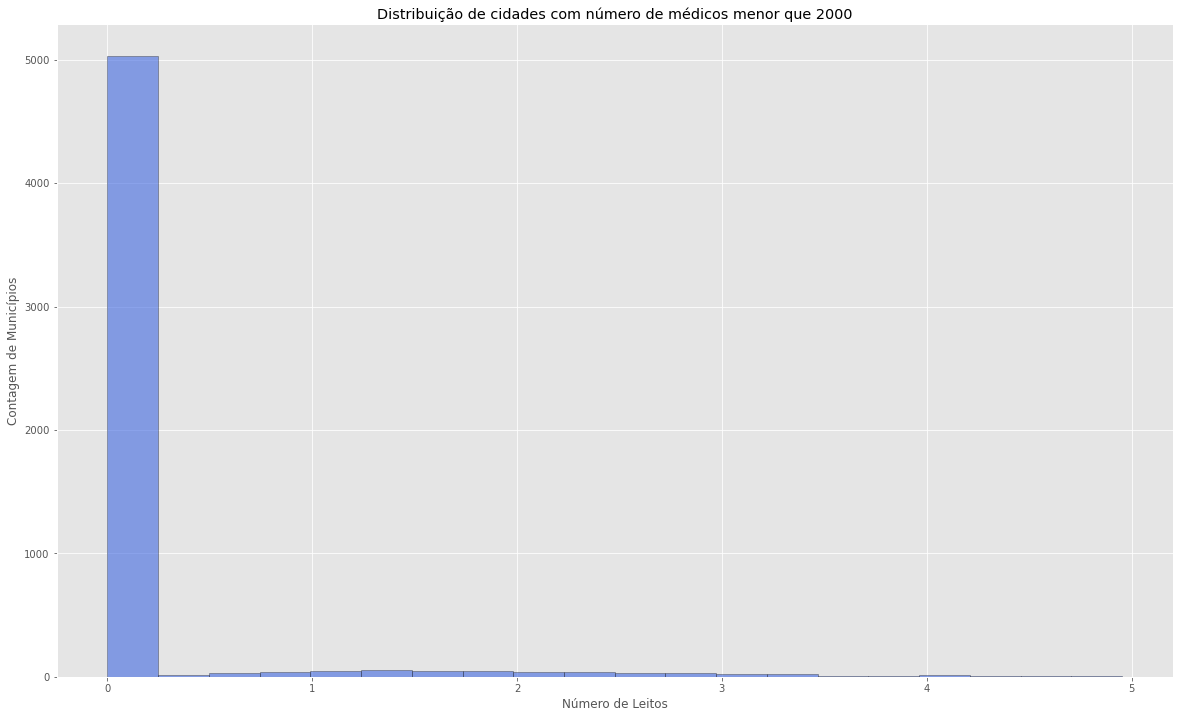

In [49]:
plt.figure(figsize = (20, 12))
df[df["LeitosUTItotal10mil"] <5]["LeitosUTItotal10mil"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição de cidades com número de médicos menor que 2000")
plt.xlabel("Número de Leitos")
plt.ylabel("Contagem de Municípios")

Note que mais de 5000 municípios possuem de 0 a 1 leito de UTI para cada 10mil habitantes. Devemos ressaltar que a OMS apresenta como ideal de 1 a 3 leitos.

Em seguida, iremos avaliar o número de municípios que possuem mais de um leito de UTI para cada 10 mil habitantes. 

In [50]:
df_leitos_uti_minimo = df.loc[df['LeitosUTItotal10mil'] >= 1]
df_leitos_uti_minimo

Código_do_Município       Nome_Estado            Nome_municipio  \
OBJECTID_1                                                                    
2                       1100023          Rondônia                 Ariquemes   
4                       1100049          Rondônia                    Cacoal   
17                      1100205          Rondônia               Porto Velho   
22                      1100304          Rondônia                   Vilhena   
67                      1200401              Acre                Rio Branco   
...                         ...               ...                       ...   
5517                    5218508             Goiás              Quirinópolis   
5521                    5218805             Goiás                 Rio Verde   
5527                    5219308             Goiás     Santa Helena de Goiás   
5541                    5220108             Goiás  São Luís de Montes Belos   
5570                    5300108  Distrito Federal                  Brasília   

            Pop_total  Leitos_UTI_Total_1  LeitosUTItotal10mil  
OBJECTID_1                                                      
2              107863                  19             1.761494  
4               85359                  28             3.280263  
17             529544                 167             3.153657  
22              99854                  10             1.001462  
67             407319                  41             1.006582  
...               ...                 ...                  ...  
5517            50065                  11             2.197144  
5521           235647                  39             1.655018  
5527            38648                  10             2.587456  
5541            33817                   9             2.661383  
5570          3015268                 907             3.008024  

[453 rows x 6 columns]

Note que apenas 453 municípios possuem o número mínimo de leitos em UTI.

In [51]:
df_leitos_uti_minimo.describe()

Código_do_Município     Pop_total  Leitos_UTI_Total_1  \
count         4.530000e+02  4.530000e+02          453.000000   
mean          3.499355e+06  2.430933e+05           67.754967   
std           8.282359e+05  7.351654e+05          233.004661   
min           1.100023e+06  6.677000e+03            1.000000   
25%           3.127701e+06  5.402900e+04           10.000000   
50%           3.511102e+06  9.008200e+04           20.000000   
75%           4.127106e+06  2.032750e+05           44.000000   
max           5.300108e+06  1.225202e+07         3504.000000   

       LeitosUTItotal10mil  
count           453.000000  
mean              2.635884  
std               1.981078  
min               1.001462  
25%               1.525925  
50%               2.174244  
75%               3.091477  
max              22.802685

Text(0, 0.5, 'Total de Municípios')

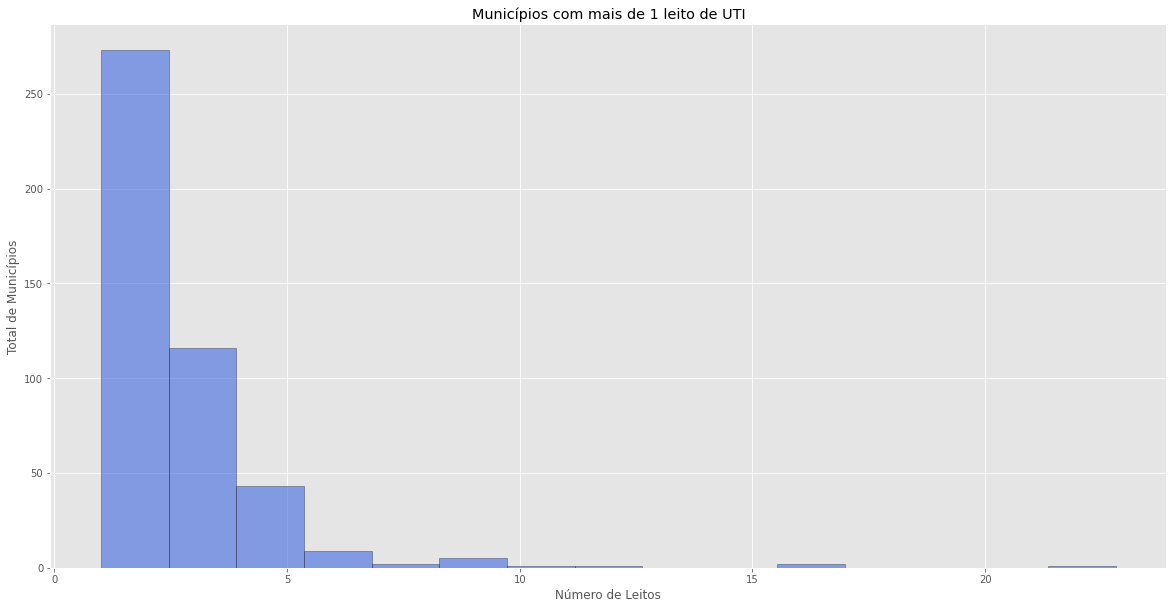

In [52]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
df_leitos_uti_minimo["LeitosUTItotal10mil"].hist(bins = 15, ec = "k", alpha = .6, color = "royalblue")
plt.title("Municípios com mais de 1 leito de UTI")
plt.xlabel("Número de Leitos")
plt.ylabel("Total de Municípios")

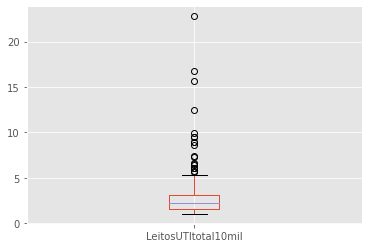

In [53]:
df_leitos_uti_minimo['LeitosUTItotal10mil'].plot.box()

In [54]:
# Agora iremos analisar a situação ideal, ou seja, mais que 3 leitos por 10mil habitantes
df_leitos_uti_ideal = df.loc[df['LeitosUTItotal10mil'] >= 3]
df_leitos_uti_ideal

Código_do_Município       Nome_Estado Nome_municipio  Pop_total  \
OBJECTID_1                                                                    
4                       1100049          Rondônia         Cacoal      85359   
17                      1100205          Rondônia    Porto Velho     529544   
170                     1501402              Pará          Belém    1492745   
540                     2105302          Maranhão     Imperatriz     258682   
636                     2111300          Maranhão       São Luís    1101884   
...                         ...               ...            ...        ...   
5385                    5205406             Goiás          Ceres      22191   
5418                    5208707             Goiás        Goiânia    1516113   
5420                    5208905             Goiás          Goiás      22645   
5480                    5214507             Goiás      Nerópolis      29850   
5570                    5300108  Distrito Federal       Brasília    3015268   

            Leitos_UTI_Total_1  LeitosUTItotal10mil  
OBJECTID_1                                           
4                           28             3.280263  
17                         167             3.153657  
170                        451             3.021280  
540                        104             4.020380  
636                        357             3.239905  
...                        ...                  ...  
5385                        19             8.562030  
5418                       611             4.030043  
5420                        10             4.415986  
5480                        50            16.750419  
5570                       907             3.008024  

[119 rows x 6 columns]

In [55]:
df_leitos_uti_ideal.describe()

Código_do_Município     Pop_total  Leitos_UTI_Total_1  \
count         1.190000e+02  1.190000e+02          119.000000   
mean          3.494771e+06  3.473339e+05          138.983193   
std           8.156121e+05  7.868763e+05          300.915664   
min           1.100049e+06  1.055600e+04            6.000000   
25%           3.121956e+06  3.221000e+04           20.000000   
50%           3.304557e+06  1.037500e+05           46.000000   
75%           4.112554e+06  2.897505e+05          122.500000   
max           5.300108e+06  6.718903e+06         2587.000000   

       LeitosUTItotal10mil  
count           119.000000  
mean              4.798888  
std               2.792767  
min               3.008024  
25%               3.333623  
50%               4.030043  
75%               4.929522  
max              22.802685

Text(0, 0.5, 'Total de Municípios')

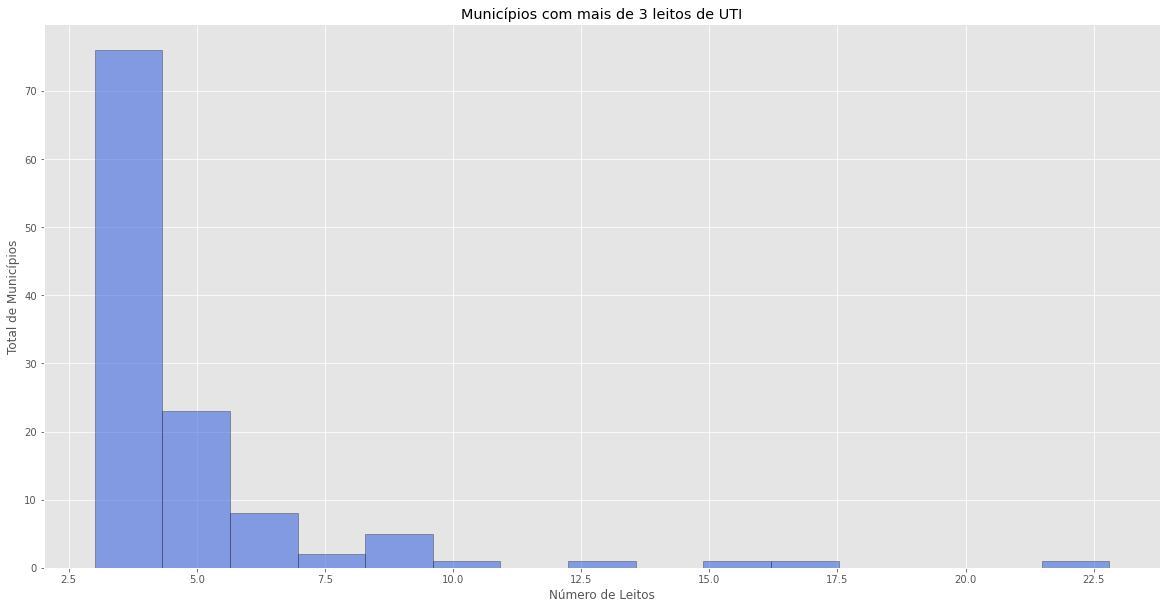

In [56]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
df_leitos_uti_ideal["LeitosUTItotal10mil"].hist(bins = 15, ec = "k", alpha = .6, color = "royalblue")
plt.title("Municípios com mais de 3 leitos de UTI")
plt.xlabel("Número de Leitos")
plt.ylabel("Total de Municípios")

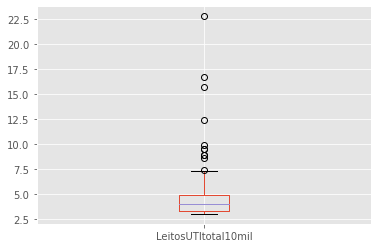

In [57]:
df_leitos_uti_ideal['LeitosUTItotal10mil'].plot.box()

A seguir foi criada uma análise interativa para determinar o número de leitos maior que o ideal para cada Estado brasileiro. No exemplo a seguir, utilizamos o Estado da Bahia como objeto de estudo.

In [59]:
# Agora podemos filtrar por nome de Estado quantas cidades possuem quantidade de leito maior que o mínimo
x = str(input('Digite o nome do Estado que você deseja analisar:'))
df_x = df.loc[(df['Nome_Estado'] == x) & 
                          (df['LeitosUTItotal10mil'] > 1)]

#Contar o número de municípios no Estado analisado
z = df[df['Nome_Estado'] == x].count()
tot_mun = z['Nome_Estado']

print('O estado do/a {} possui {} municípios'.format(x, tot_mun))
print('O total de municípios com número de leitos maior que o ideal é de {}'
      .format(df_x['Nome_Estado'].count()))

Digite o nome do Estado que você deseja analisar:Bahia
O estado do/a Bahia possui 417 municípios
O total de municípios com número de leitos maior que o ideal é de 20


### 6. Discussão e próximos passos


Alguns pontos observados à partir da busca e coleta de dados, e posterior análise exploratória inicial foram:
1) Para os dados referentes a óbitos, será necessário obter dados mais atualizados pois os coletados são até 22 de Julho de 2020.
2) O objetivo do trabalho é identificar se existe alguma relação entre o número de óbitos observado em determinadas regiões (Região, Estado e Município) e os profissionais (Médicos, Enfermeiros e Fisioterapeutas) e recursos (Leitos de UTI e Respiradores) existentes. Analisando inicialmente os números brutos, a relação encontrada é que locais com mais recursos tem mais óbitos, o que parece ser óbvio, pois mais recursos estão relacionados a mais população, e mais população resulta em um número maior de casos e óbitos. Deve-se destacar também a importância de normalizar todos os dados. Um exemplo importante da necessidade de normalização dos dados é quando comparamos o número de médicos por região, como no caso de Curitiba e Blumenau (Curitiba possui um total de médicos muito maior que os demais municipios, contudo quando normalizamos, cidades como Blumenau posuem valores por pessoa melhores).  

Diante do exposto, o grupo entende que será necessário encontrar alguma métrica para identificar se os recursos de saúde para atender a casos graves de COVID-19 são apropriados, ou seja, se estão de acordo com normais estabelecidas que indiquem, por exemplo, quantos médicos, efermeiros e fisioterapeutas é indicado por habitantes ou leitos de UTI disponíveis.  
À partir dessas métricas deveríamos realizar novas análises para identificar possíveis correlações.